In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo
from sklearn.model_selection import cross_val_score

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
df = pd.DataFrame(data=heart_disease.data.features)
df['target'] = heart_disease.data.targets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [ ]:
df['target'] = df['target'].apply(lambda x: 1 if x >= 1 else 0)
df['target'].value_counts()

,count
target,
0,160
1,137


In [ ]:
from re import X
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 33, stratify= y)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(criterion= 'gini', random_state = 33)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=33)

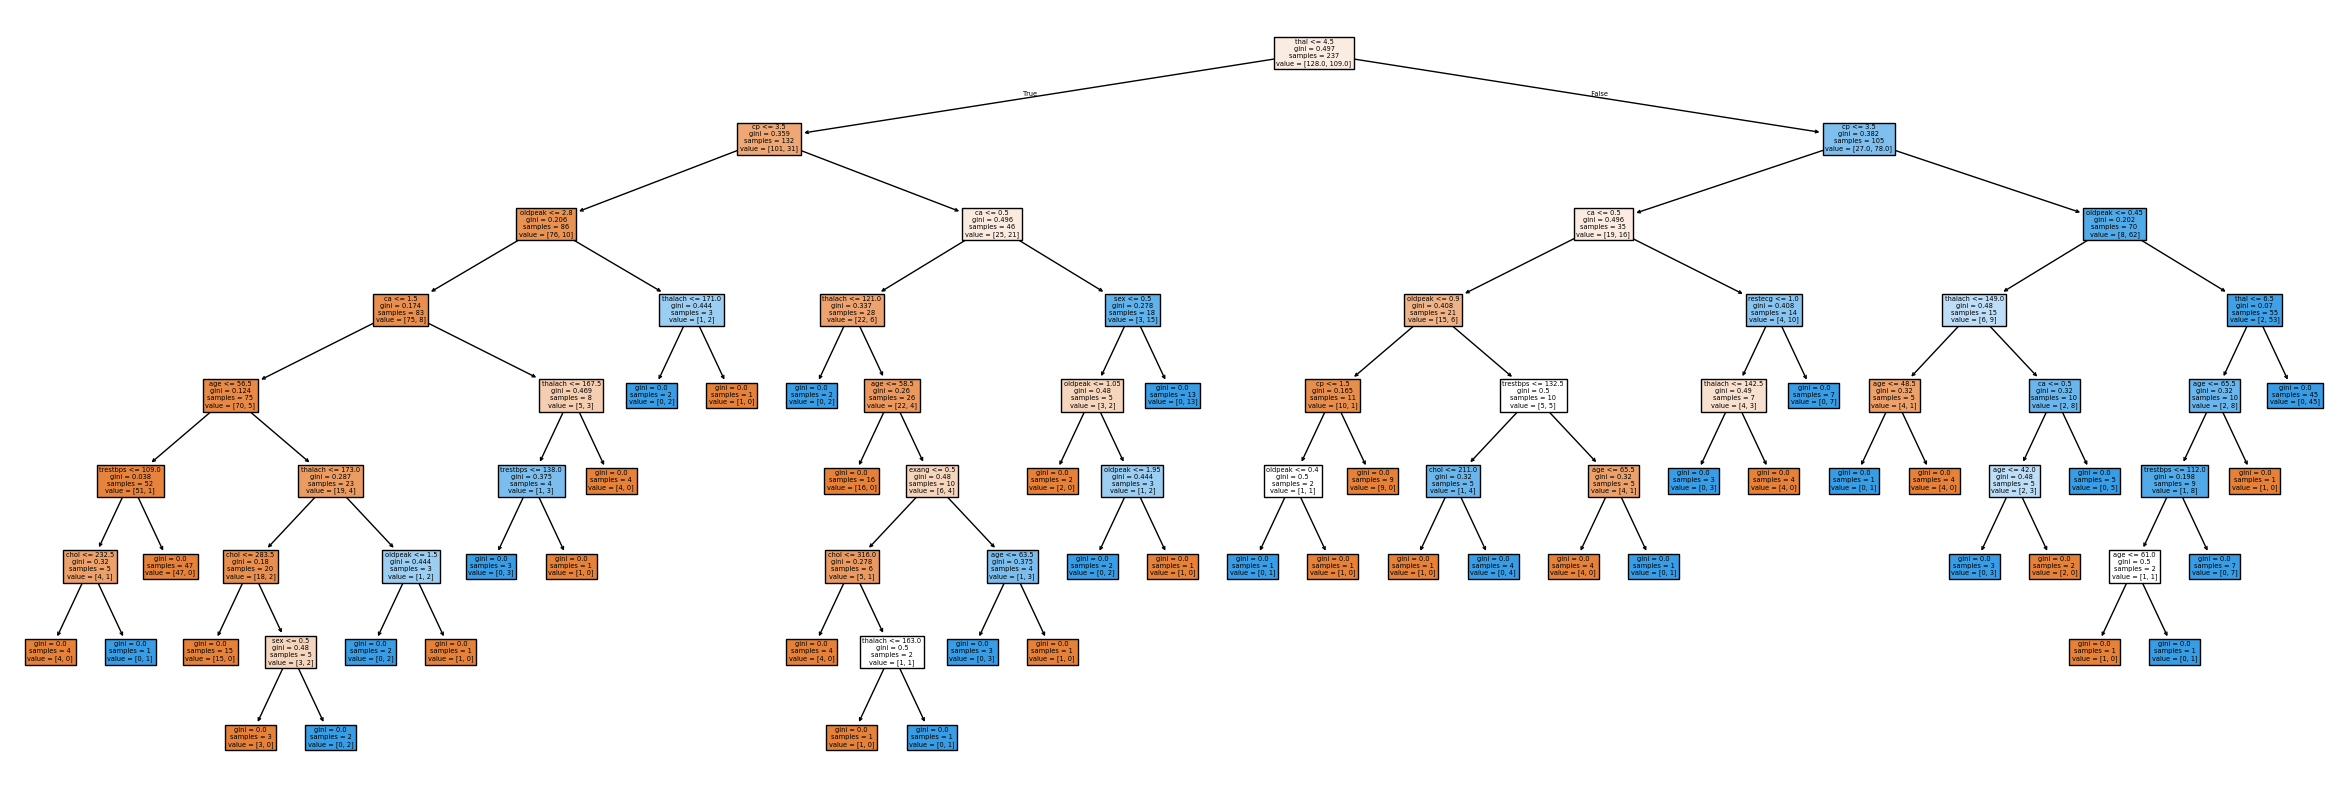

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names= df.columns[:-1])
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



# test binaty tree

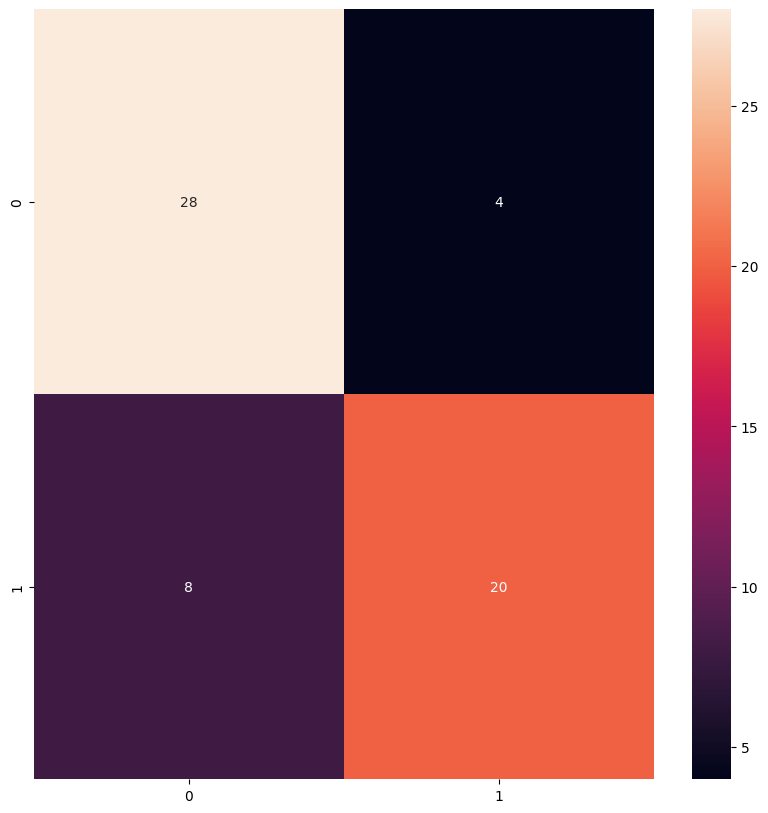

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

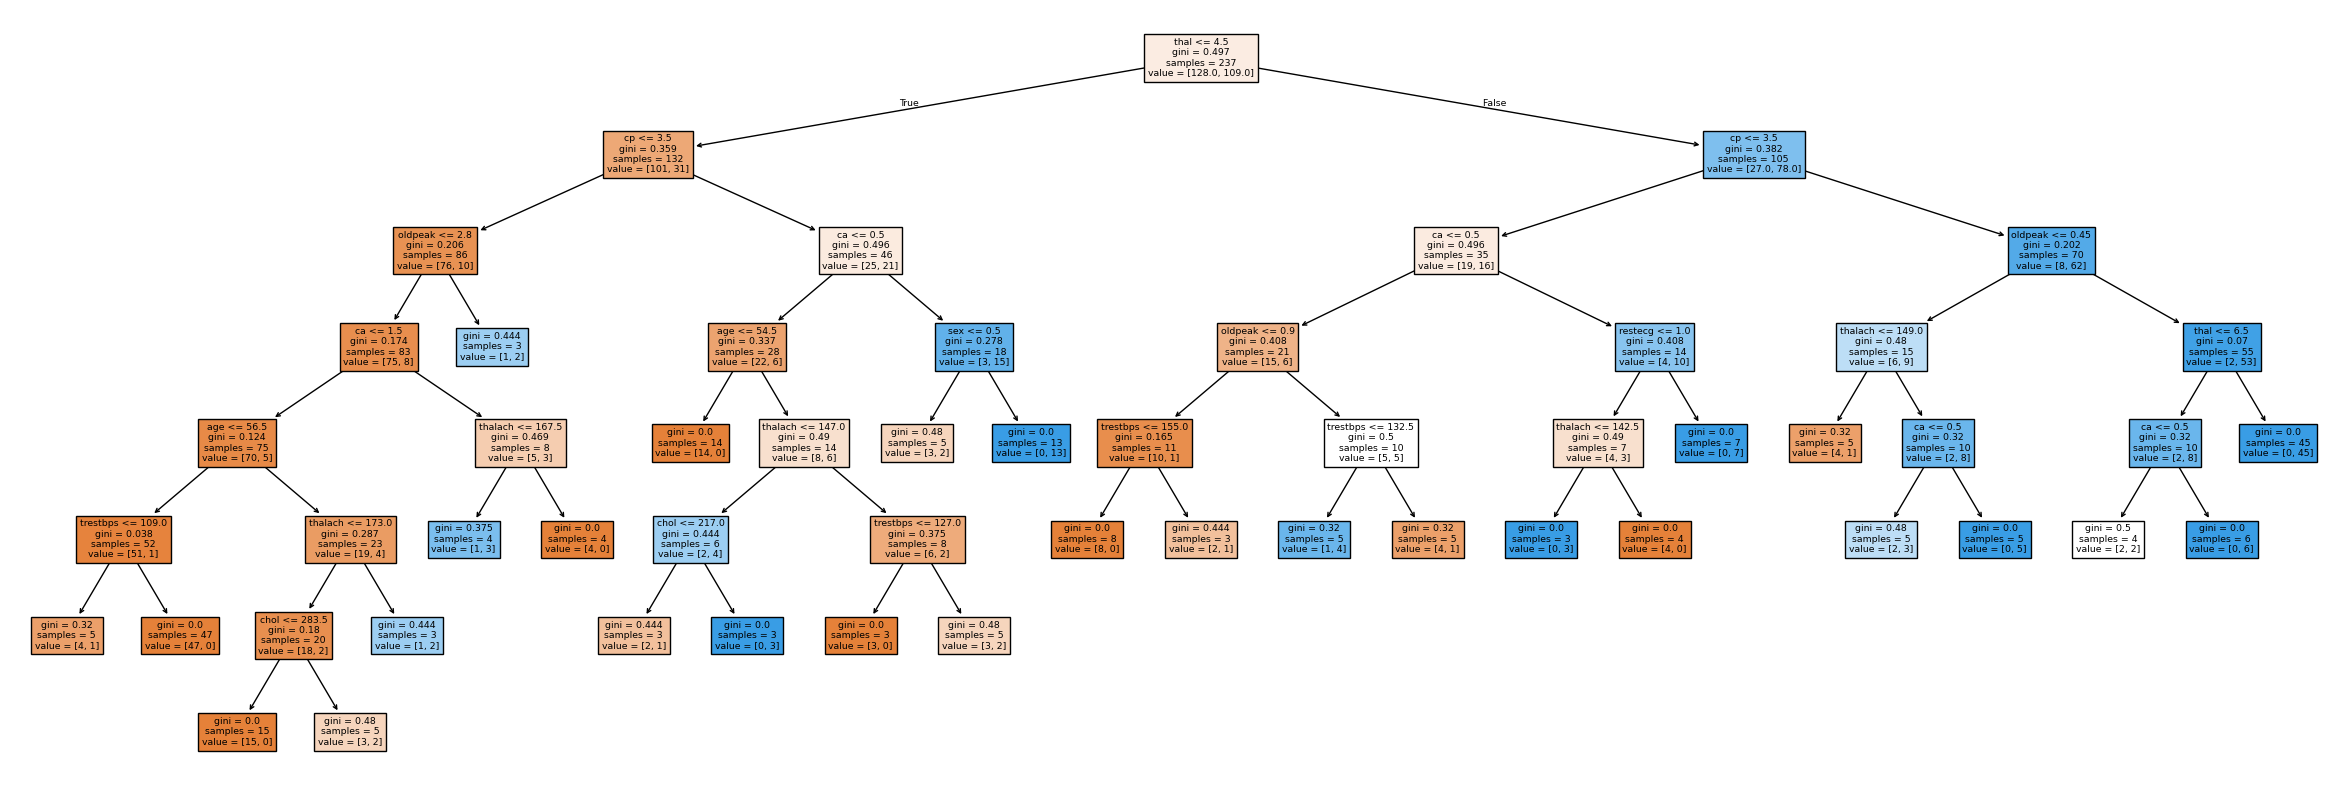

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



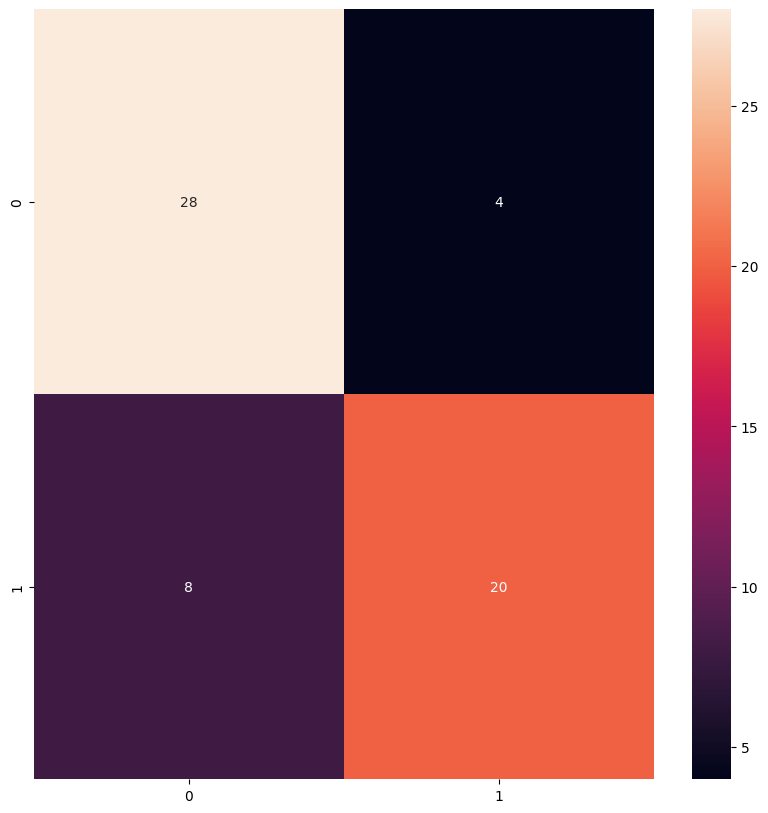

[0.83333333 0.75       0.74468085 0.78723404 0.80851064]
0.7847517730496454


In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', random_state = 33, min_samples_leaf= 3, max_depth= 10, min_samples_split= 4)
clf.fit(X_train, y_train)
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names= df.columns[:-1])
plt.show()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

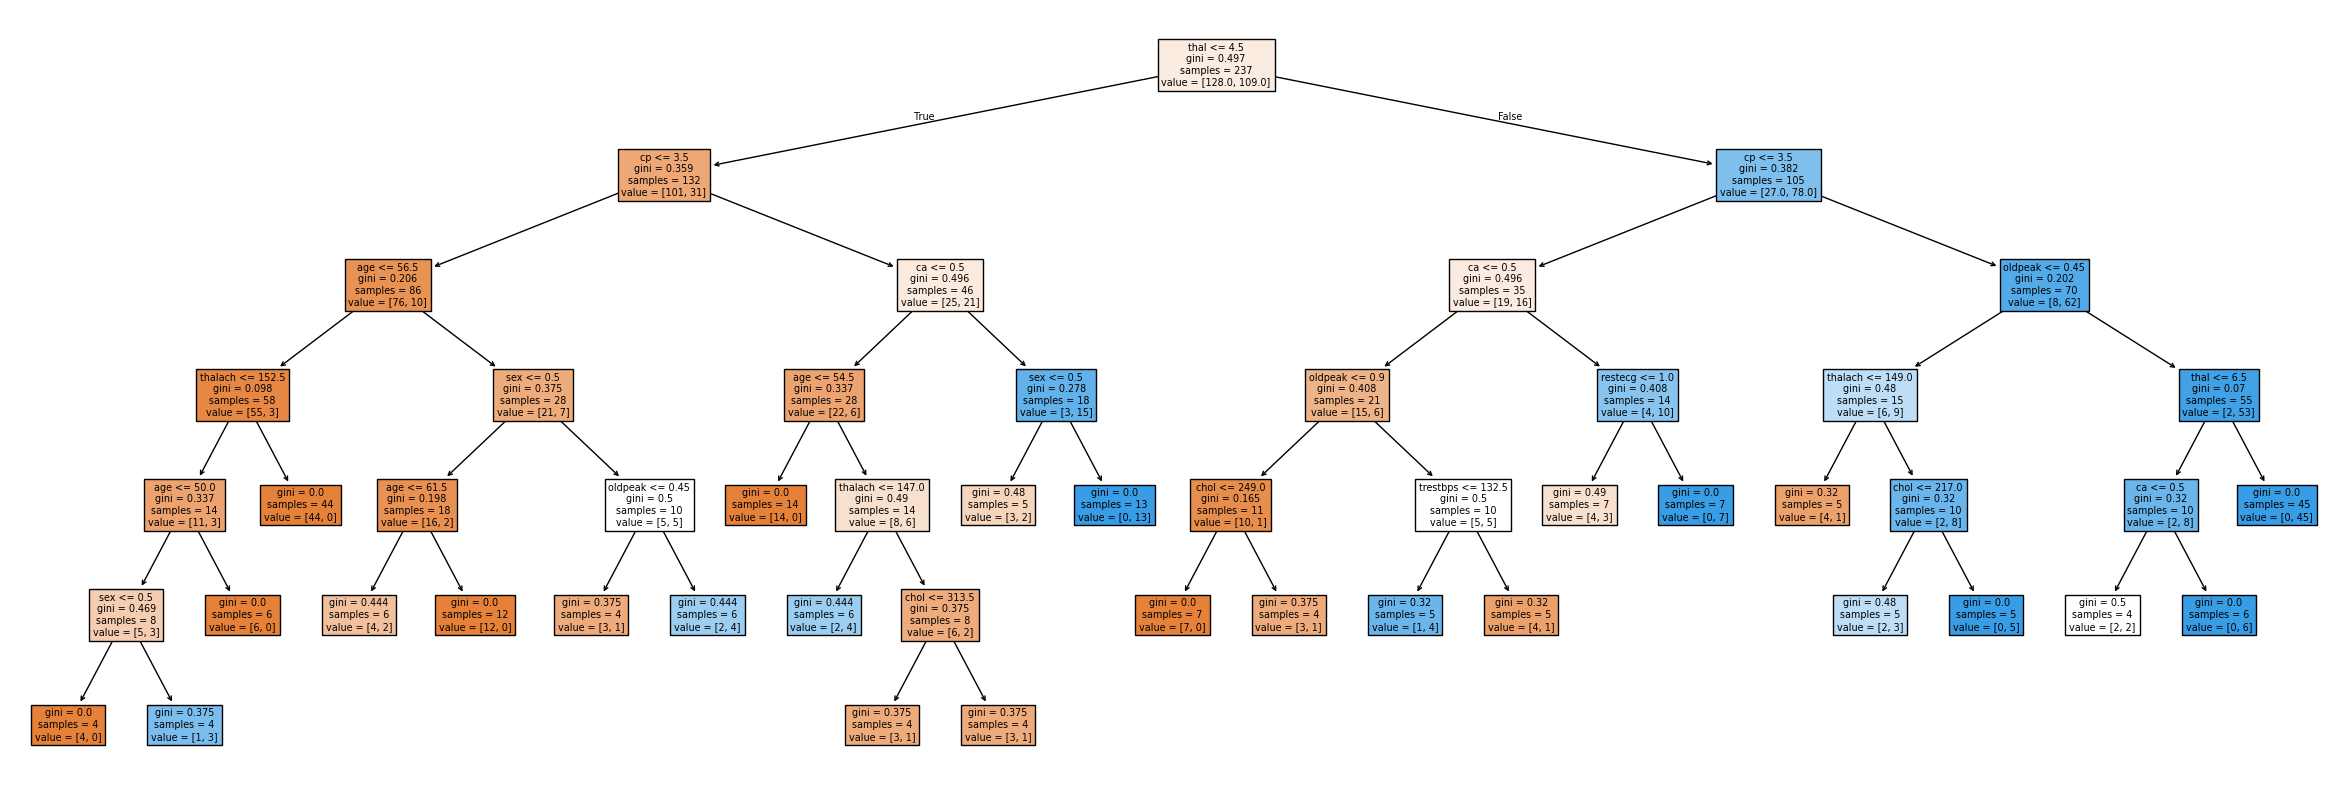

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.78      0.64      0.71        28

    accuracy                           0.75        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



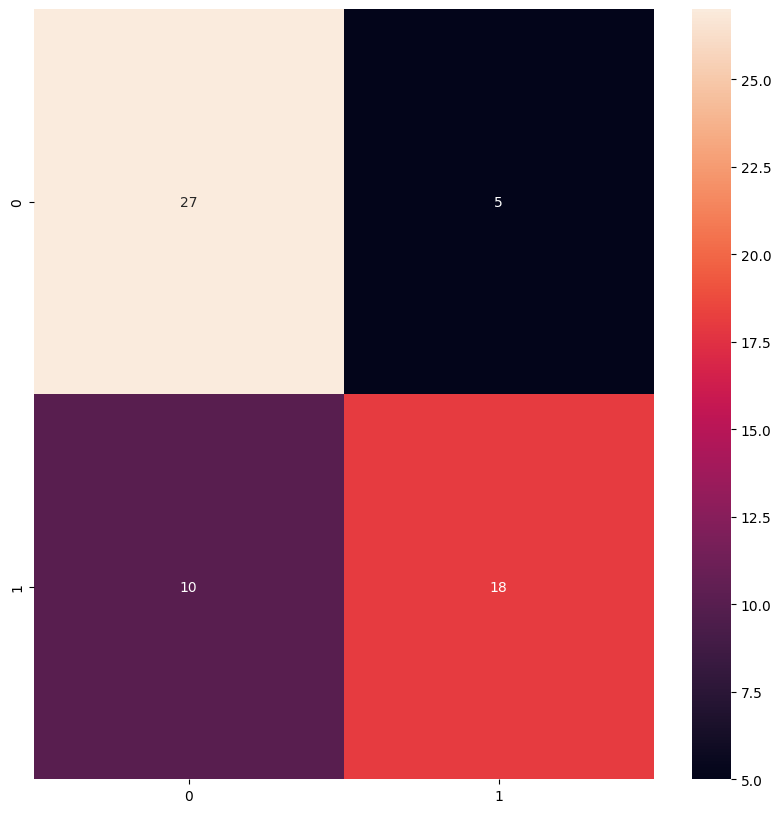

[0.77083333 0.75       0.78723404 0.80851064 0.74468085]
0.7722517730496454
0.75


In [ ]:


clf = DecisionTreeClassifier(criterion= 'gini', random_state = 33, min_samples_leaf= 4, max_depth= 8, min_samples_split= 8)
clf.fit(X_train, y_train)

plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names= df.columns[:-1])
plt.show()

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

print(accuracy_score(y_test, y_pred))

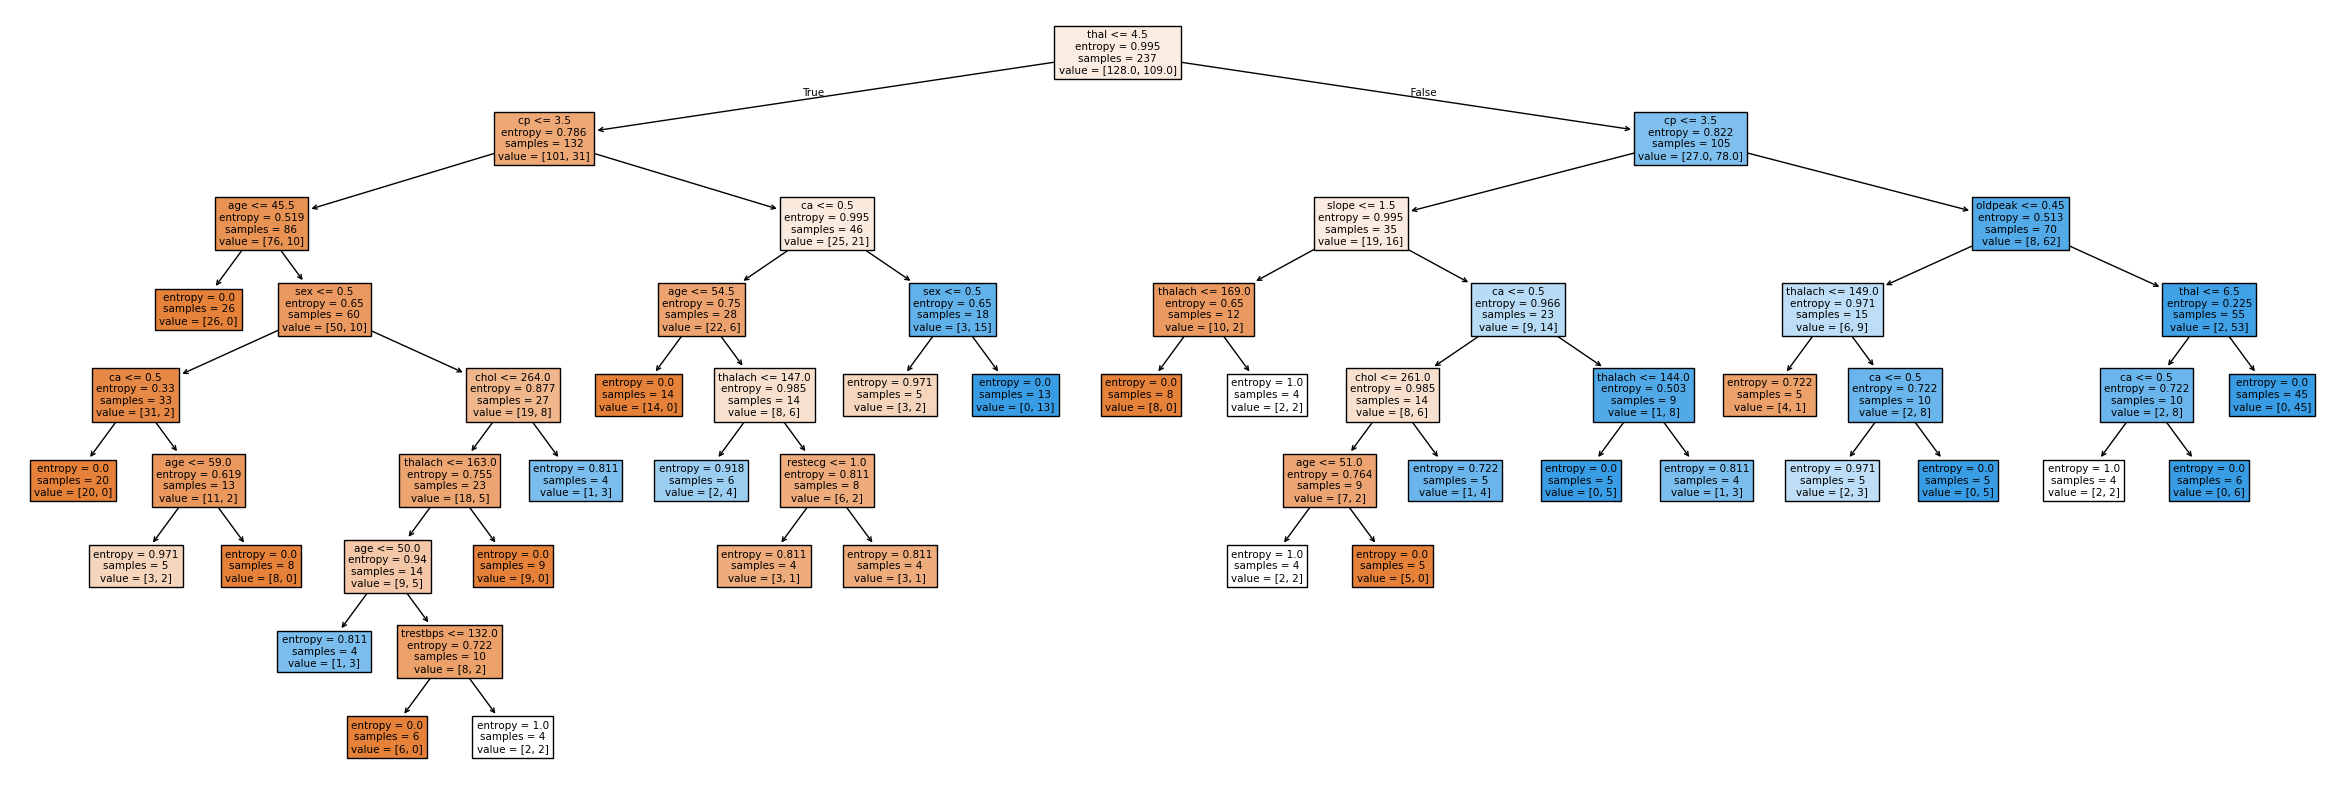

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.75      0.75      0.75        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



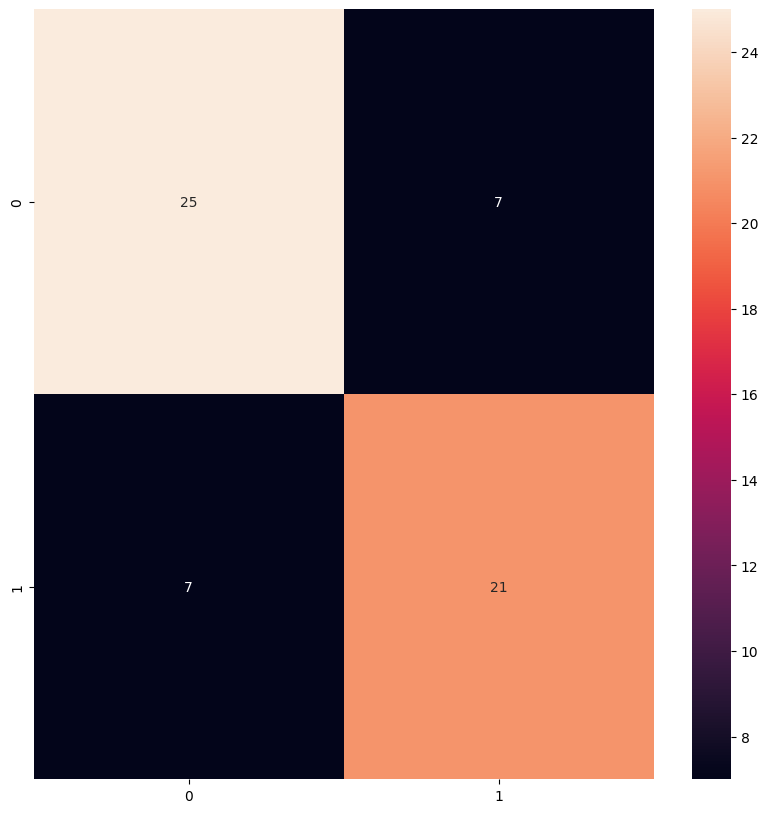

[0.79166667 0.70833333 0.80851064 0.80851064 0.78723404]
0.7808510638297872


In [ ]:
clf = DecisionTreeClassifier(criterion= 'entropy', random_state = 33, min_samples_leaf= 4, max_depth= 8, min_samples_split= 8)
clf.fit(X_train, y_train)


plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names= df.columns[:-1])
plt.show()

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

min sample split fa una grande diferenza

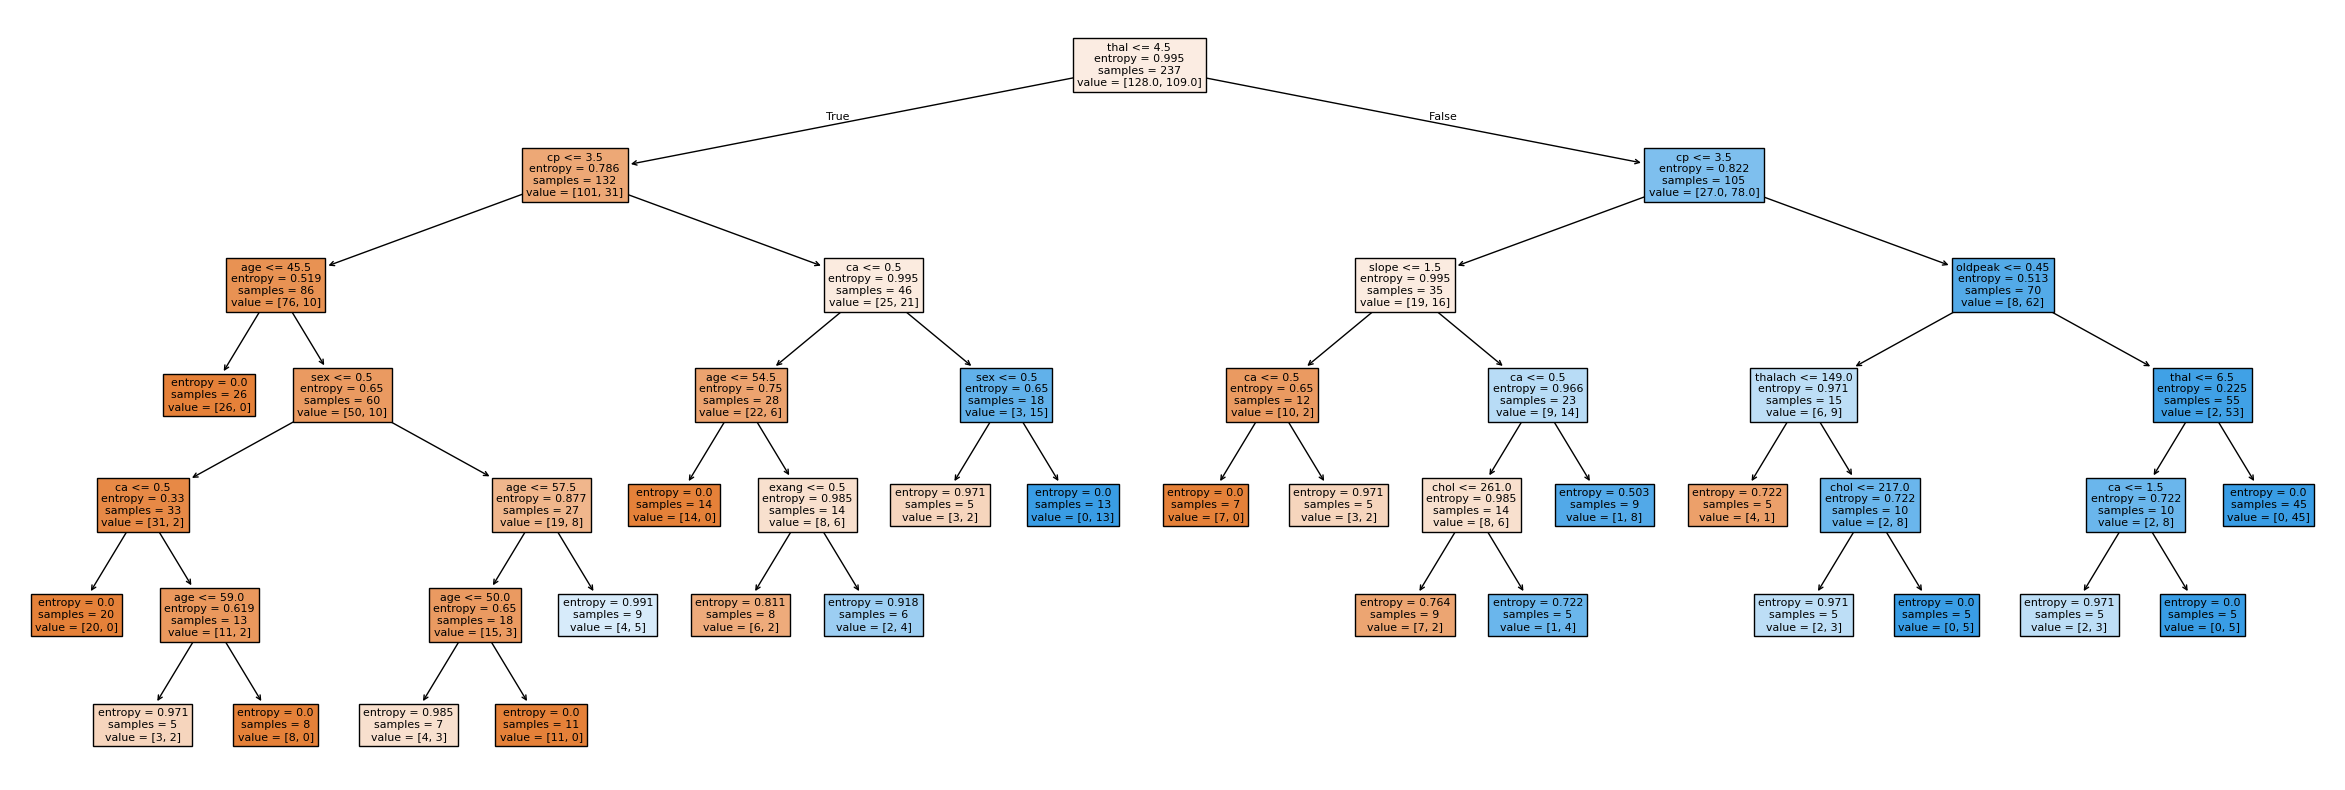

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



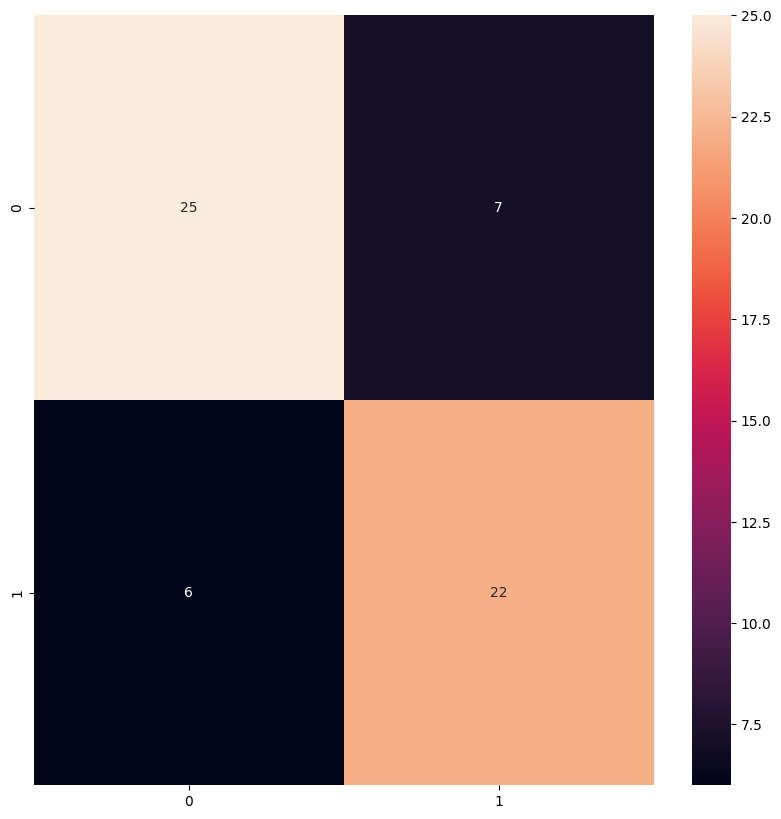

[0.77083333 0.77083333 0.82978723 0.80851064 0.72340426]
0.7806737588652483


In [ ]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state = 33, min_samples_leaf= 5, max_depth= 8, min_samples_split= 8)
clf.fit(X_train, y_train)
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names= df.columns[:-1])
plt.show()

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import time

In [ ]:
from re import X
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 33, stratify = y)


In [ ]:
"""
my_list = pd.DataFrame(columns=['n_estimators', 'accuracy'])
df_time = pd.DataFrame(columns=['n_estimators', 'duration'])

for i in range(1, 1001, 10):

  start = time.time()

  clf = RandomForestClassifier(n_estimators = i, random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  new_row = pd.DataFrame([{'n_estimators': i, 'accuracy': round(accuracy_score(y_test, y_pred),2)}])
  df_time = pd.concat([my_list, new_row], ignore_index=True)

  print(f"num of trees: {i}")
  print(f"f1-score:  {round(f1_score(y_test, y_pred),2)}")
  print(f"Acuracy: {round(accuracy_score(y_test, y_pred),2)}")

  end = time.time()
  duration = end - start
  print(f"duration: {round(duration,2)}")
  new_row = pd.DataFrame([{'n_estimators': i, 'duration': duration}])
  my_list = pd.concat([df_time, new_row], ignore_index=True)
  print("")
"""

num of trees: 1
f1-score:  0.76
Acuracy: 0.77
duration: 0.04

num of trees: 11
f1-score:  0.74


/tmp/ipython-input-81-1953943473.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_time = pd.concat([my_list, new_row], ignore_index=True)


Acuracy: 0.77
duration: 0.11

num of trees: 21
f1-score:  0.8
Acuracy: 0.82
duration: 0.25

num of trees: 31
f1-score:  0.85
Acuracy: 0.87
duration: 0.28

num of trees: 41
f1-score:  0.85
Acuracy: 0.87
duration: 0.42

num of trees: 51
f1-score:  0.87
Acuracy: 0.88
duration: 0.42

num of trees: 61
f1-score:  0.87
Acuracy: 0.88
duration: 0.61

num of trees: 71
f1-score:  0.85
Acuracy: 0.87
duration: 0.46

num of trees: 81
f1-score:  0.85
Acuracy: 0.87
duration: 0.53

num of trees: 91
f1-score:  0.85
Acuracy: 0.87
duration: 0.33

num of trees: 101
f1-score:  0.82
Acuracy: 0.85
duration: 0.53

num of trees: 111
f1-score:  0.82
Acuracy: 0.85
duration: 0.51

num of trees: 121
f1-score:  0.82
Acuracy: 0.85
duration: 0.87

num of trees: 131
f1-score:  0.81
Acuracy: 0.83
duration: 0.34

num of trees: 141
f1-score:  0.82
Acuracy: 0.85
duration: 0.26

num of trees: 151
f1-score:  0.81
Acuracy: 0.83
duration: 0.29

num of trees: 161
f1-score:  0.81
Acuracy: 0.83
duration: 0.31

num of trees: 171
f

In [ ]:
my_list.head()

,n_estimators,accuracy,duration
0,1,0.77,NaN
1,1,NaN,0.036300
2,11,0.77,NaN
3,11,NaN,0.112781
4,21,0.82,NaN


<Axes: xlabel='n_estimators', ylabel='accuracy'>

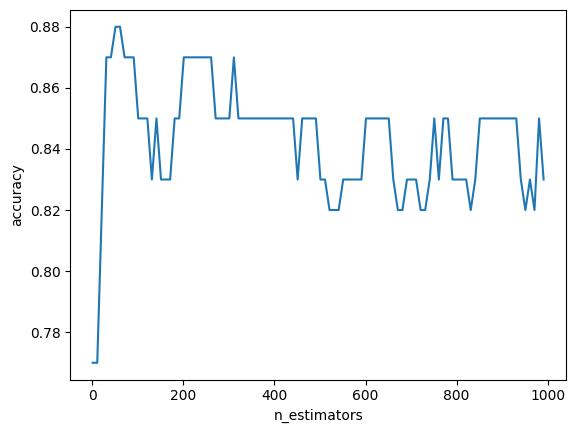

In [ ]:
import seaborn as sns
sns.lineplot(x='n_estimators', y='accuracy', data=my_list)

<Axes: xlabel='n_estimators', ylabel='duration'>

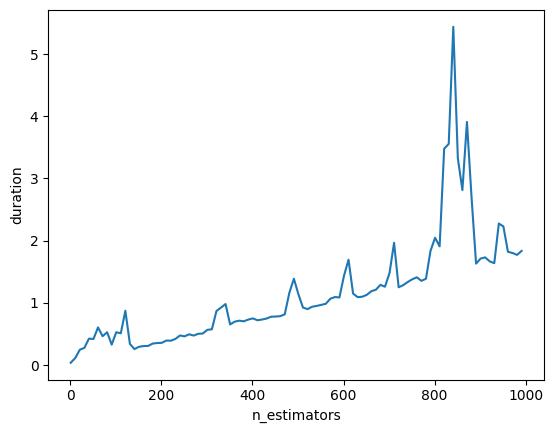

In [ ]:
sns.lineplot(x='n_estimators', y='duration', data=my_list)

# svn

In [ ]:
from sklearn.svm import SVC

## hard

In [ ]:
svm_hard = SVC(kernel='linear', C=1e8)
svm_hard.fit(X_train, y_train)

SVC(C=100000000.0, kernel='linear')

In [ ]:
  y_pred = svm_hard.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(f"f1-score:  {round(f1_score(y_test, y_pred),2)}")
  print(f"Acuracy: {round(accuracy_score(y_test, y_pred),2)}")

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.92      0.82      0.87        28

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

f1-score:  0.87
Acuracy: 0.88


## soft

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm_soft = SVC(kernel='linear', C=4.0)
svm_soft.fit(X_train, y_train)

SVC(C=4.0, kernel='linear')

In [ ]:
  y_pred = svm_soft.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(f"f1-score:  {round(f1_score(y_test, y_pred),2)}")
  print(f"Acuracy: {round(accuracy_score(y_test, y_pred),2)}")

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.86      0.86      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

f1-score:  0.86
Acuracy: 0.87


In [ ]:
svm_soft = SVC(kernel='linear', C=10.0)
svm_soft.fit(X_train, y_train)
y_pred = svm_soft.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"f1-score:  {round(f1_score(y_test, y_pred),2)}")
print(f"Acuracy: {round(accuracy_score(y_test, y_pred),2)}")

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

f1-score:  0.84
Acuracy: 0.85


## grisearch svc

In [ ]:
param_grid = {
    'C': [1, 2, 3, 4, 10, 50, 100],
    'kernel': ['linear']  # optionally add other kernels
}

# Create the SVC model
svc = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit it to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'C': 10, 'kernel': 'linear'}
Best cross-validation accuracy: 0.8228723404255319


## svc poly

In [ ]:
svm_soft = SVC(kernel='poly', degree= 4 , C=90)
svm_soft.fit(X_train, y_train)
y_pred = svm_soft.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"f1-score:  {round(f1_score(y_test, y_pred),2)}")
print(f"Acuracy: {round(accuracy_score(y_test, y_pred),2)}")

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

f1-score:  0.87
Acuracy: 0.88


In [ ]:
param_grid = {
    'C': [1, 2, 3, 4, 10, 50, 100],
    'kernel': ['poly'],  # optionally add other kernels
    'degree': [1, 2, 3, 4, 5]
}

# Create the SVC model
svc = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit it to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'C': 100, 'degree': 3, 'kernel': 'poly'}
Best cross-validation accuracy: 0.7844858156028369


## svc rbf

In [ ]:
svm_soft = SVC(kernel='rbf', gamma=1 , C=10)
svm_soft.fit(X_train, y_train)
y_pred = svm_soft.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"f1-score:  {round(f1_score(y_test, y_pred),2)}")
print(f"Acuracy: {round(accuracy_score(y_test, y_pred),2)}")

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        32
           1       0.00      0.00      0.00        28

    accuracy                           0.53        60
   macro avg       0.27      0.50      0.35        60
weighted avg       0.28      0.53      0.37        60

f1-score:  0.0
Acuracy: 0.53


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
